# Talk demo during introduction

In [8]:
! pip install -q torch tensor-sensor

In [2]:
import tsensor
tsensor.__version__

'0.1.3dev'

## Simulated GRU matrix algebra with dimension issue

In [7]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
nhidden = 256

Whh_ = torch.eye(nhidden, nhidden)  # Identity matrix
Uxh_ = torch.randn(d, nhidden)
bh_  = torch.zeros(nhidden, 1)
h = torch.randn(nhidden, 1)         # fake previous hidden state h
r = torch.randn(nhidden, 1)         # fake this computation
X = torch.rand(n,d)                 # fake input

# Following code raises an exception!
h_ = torch.tanh(Whh_ @ (r*h) + Uxh_ @ X.T + bh_)  # GRU state vector update equation

RuntimeError: mat1 and mat2 shapes cannot be multiplied (764x256 and 764x200)

## TensorSensor traps, clarifies, and visualizes issues

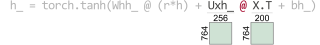

RuntimeError: mat1 and mat2 shapes cannot be multiplied (764x256 and 764x200)
Cause: @ on tensor operand Uxh_ w/shape [764, 256] and operand X.T w/shape [764, 200]

In [6]:
import tsensor

with tsensor.clarify():
    h_ = torch.tanh(Whh_ @ (r*h) + Uxh_ @ X.T + bh_)

TensorSensor has augmented the exception object's message with:

```
Cause: @ on tensor operand Uxh_ w/shape [764, 256] and operand X.T w/shape [764, 200]
```